<a href="https://colab.research.google.com/github/renzotaco/datascience/blob/main/WebScrapingCovidCsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
page = requests.get("https://www.worldometers.info/coronavirus")

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 268,889,002 Cases and 5,306,277 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
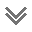

In [2]:
#importing the BeautifulSoup library
from bs4 import BeautifulSoup

#Instatiating the BeautifulSoup Class
soup = BeautifulSoup(page.content, 'lxml')
#Where soup is a variable containing the HTML of the webpage

print(soup.prettify())

In [3]:
# Search for the table and extracting it
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [4]:
rows = table.find_all("tr", attrs={"style": ""})

data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests'],
 ['World',
  '268,889,002',
  '+176,194',
  '5,306,277',
  '+3,656',
  '242,019,751',
  '+237,471',
  '21,562,974',
  '88,861',
  '34,496',
  '680.7',
  ''],
 ['1',
  'USA',
  '50,535,791',
  '',
  '815,269 ',
  '',
  '39,879,448',
  '',
  '9,841,074',
  '14,647',
  '151,399',
  '2,442'],
 ['2',
  'India',
  '34,674,744',
  '',
  '474,735 ',
  '',
  '34,105,066',
  '+7,678',
  '94,943',
  '8,944',
  '24,777',
  '339'],
 ['3',
  'Brazil',
  '22,177,059',
  '',
  '616,504 ',
  '',
  '21,407,699',
  '',
  '152,856',
  '8,318',
  '103,279',
  '2,871'],
 ['4',
  'UK',
  '10,660,981',
  '',
  '146,135 ',
  '',
  '9,378,165',
  '',
  '1,136,681',
  '890',
  '155,866',
  '2,137'],
 ['5',
  'Russia',
  '9,956,679',
  '+30,873',
  '287,180 ',
  '+1,176',
  '8,673,518',
  '+

In [6]:
!pip install dask

In [8]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 132 kB 8.3 MB/s 


In [9]:
# to suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)

df.head()

# Country,Other  ... Tot Cases/1M pop Deaths/1M pop
0  World   268,889,002  ...            680.7              
1      1           USA  ...          151,399         2,442
2      2         India  ...           24,777           339
3      3        Brazil  ...          103,279         2,871
4      4            UK  ...          155,866         2,137

[5 rows x 12 columns]

In [11]:
df.to_csv('Extracted_data/data-*.csv')

['/content/Extracted_data/data-0.csv']